In [76]:
import open3d as o3d
import numpy as np
import matplotlib.image as mpimg
import re
from matplotlib import pyplot as plt

o3d.t.io.RealSenseSensor.list_devices()

[Open3D INFO] [0] Intel RealSense D435: 051122073420
[Open3D INFO] 	depth_fps: [100 | 15 | 30 | 300 | 6 | 60 | 90]
[Open3D INFO] 	depth_resolution: [1280,720 | 256,144 | 424,240 | 480,270 | 640,360 | 640,480 | 848,100 | 848,480]
[Open3D INFO] 	depth_format: [RS2_FORMAT_Z16]
[Open3D INFO] 	color_fps: [15 | 30 | 6 | 60]
[Open3D INFO] 	visual_preset: []
[Open3D INFO] 	color_resolution: [1280,720 | 1920,1080 | 320,180 | 320,240 | 424,240 | 640,360 | 640,480 | 848,480 | 960,540]
[Open3D INFO] 	color_format: [RS2_FORMAT_BGR8 | RS2_FORMAT_BGRA8 | RS2_FORMAT_RGB8 | RS2_FORMAT_RGBA8 | RS2_FORMAT_Y16 | RS2_FORMAT_YUYV]
[Open3D INFO] Open3D only supports synchronized color and depth capture (color_fps = depth_fps).


True

In [77]:
rs = o3d.t.io.RealSenseSensor()

In [78]:
rs.start_capture(True)  # true: start recording with capture
for fid in range(1):
    im_rgbd = rs.capture_frame(True, True)  # wait for frames and align them
    # process im_rgbd.depth and im_rgbd.color
rs.stop_capture()
print(im_rgbd)

[Open3D INFO] Capture started with RealSense camera 051122073420
RGBD Image pair [Aligned]
Color [size=(640,480), channels=3, format=UInt8, device=CPU:0]
Depth [size=(640,480), channels=1, format=UInt16, device=CPU:0]
[Open3D INFO] Capture stopped.


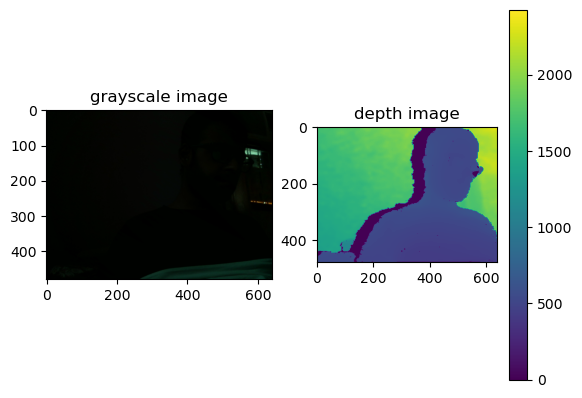

In [80]:
plt.subplot(1, 2, 1)
plt.title('grayscale image')
plt.imshow(im_rgbd.color)
plt.subplot(1, 2, 2)
plt.title('depth image')
plt.imshow(im_rgbd.depth)
plt.colorbar()
plt.show()

In [81]:
def visualize_rgbd(rgbd_image):
    print(rgbd_image)
    o3d.visualization.draw_geometries([rgbd_image])
    intrinsic = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,intrinsic)
    
    # Flip it, otherwise the pointcloud will be upside down.
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])
    
    
def tst_dataset(im_rgbd):
    color_raw = o3d.geometry.Image(np.asarray(im_rgbd.color))
    depth_raw = o3d.geometry.Image(np.asarray(im_rgbd.depth))
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)
    visualize_rgbd(rgbd_image)

tst_dataset(im_rgbd)

In [54]:
def redwood_dataset():
    print("Read Redwood dataset")
    redwood_data = o3d.data.SampleRedwoodRGBDImages()
    color_raw = o3d.io.read_image(redwood_data.color_paths[0])
    depth_raw = o3d.io.read_image(redwood_data.depth_paths[0])
    print(color_raw)
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)

    print("Displaying Redwood color and depth images and pointcloud ...")
    visualize_rgbd(rgbd_image)



redwood_data = o3d.data.SampleRedwoodRGBDImages()
color_raw = o3d.io.read_image(redwood_data.color_paths[0])
depth_raw = o3d.io.read_image(redwood_data.depth_paths[0])
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)

In [55]:
redwood_dataset()

Read Redwood dataset
Image of size 640x480, with 3 channels.
Use numpy.asarray to access buffer data.
Displaying Redwood color and depth images and pointcloud ...
RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


In [8]:
import json
import open3d as o3d
with open(config_filename) as cf:
    rs_cfg = o3d.t.io.RealSenseSensorConfig(json.load(cf))

rs = o3d.t.io.RealSenseSensor()
rs.init_sensor(rs_cfg, 0, bag_filename)
rs.start_capture(True)  # true: start recording with capture
for fid in range(150):
    im_rgbd = rs.capture_frame(True, True)  # wait for frames and align them
    # process im_rgbd.depth and im_rgbd.color
    

rs.stop_capture()

NameError: name 'config_filename' is not defined